In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
projects_df = pd.read_csv('blocks.csv', index_col='name')
projects_df['number'].describe()

47.0


count    1222.000000
mean      187.889525
std       463.677883
min         0.000000
25%         9.000000
50%        47.000000
75%       133.000000
max      5476.000000
Name: number, dtype: float64

In [4]:
no_empty = projects_df['number'] != 0
projects_df_filt = projects_df[no_empty]
projects_df_filt['number'].describe()

55.0


count    1102.000000
mean      208.349365
std       483.904379
min         1.000000
25%        17.250000
50%        55.000000
75%       152.000000
max      5476.000000
Name: number, dtype: float64

### Hemos quitado los proyectos con 0 bloques.

In [5]:
pd.options.display.max_columns = 200
projects_df_filt = projects_df_filt.drop_duplicates(projects_df_filt.columns.difference(['aia']))
projects_df_filt['number'].describe() 

count     730.000000
mean      211.482192
std       502.625759
min         1.000000
25%        29.000000
50%        60.000000
75%       164.750000
max      5476.000000
Name: number, dtype: float64

### Desechamos todos los proyectos repetidos.

In [6]:
max_n = projects_df_filt['number'] == projects_df_filt['number'].max()
blocks_max = projects_df_filt[max_n]
used_blocks = blocks_max > 0
blocks = blocks_max[used_blocks]
clean_blocks = blocks.dropna(axis = 1)
clean_blocks.shape[1]-2 # No contamos las columnas "aia" y "number"

16

Vemos que el proyecto con más bloques utiliza 16 bloques diferentes. A continuación, creamos una lista con la variedad de todos los proyectos.

In [7]:
variety_list = []
for index, row in projects_df_filt[projects_df_filt.columns.difference(['aia'])].iterrows(): # No contamos la columna "aia"
    used_blocks = row > 0
    blocks = row[used_blocks]
    cleaned_blocks = blocks.dropna()
    variety_list.append(cleaned_blocks.shape[0]-1) # No contamos la columna "number"

In [8]:
variety_df = pd.DataFrame(np.array(variety_list).reshape(len(variety_list),1), columns= ["variety"],index=projects_df_filt.index)
blocks = pd.concat([projects_df_filt, variety_df],axis=1)
print("Variedad de bloques: (" + str(blocks['variety'].min()) + "," + str(blocks['variety'].max()) + ")")

Variedad de bloques: (1,61)


In [9]:
blocks['variety'].value_counts().head()

4     73
5     60
6     49
10    44
3     40
Name: variety, dtype: int64

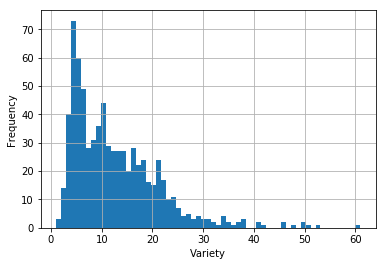

In [10]:
blocks['variety'].hist(bins=blocks['variety'].max())
plt.xlabel("Variety")
plt.ylabel("Frequency")
plt.show()

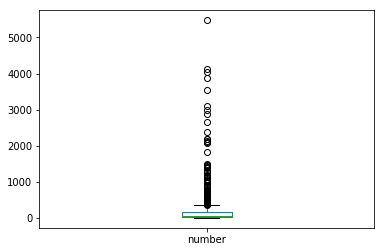

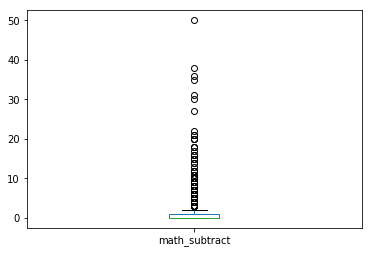

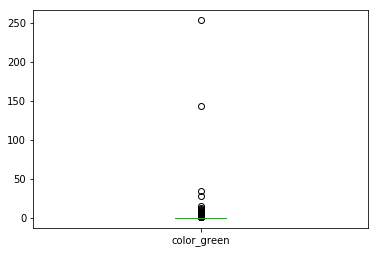

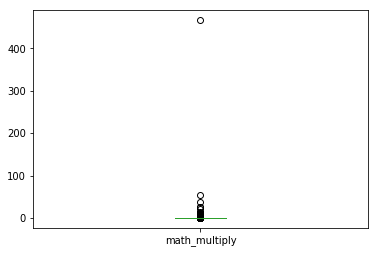

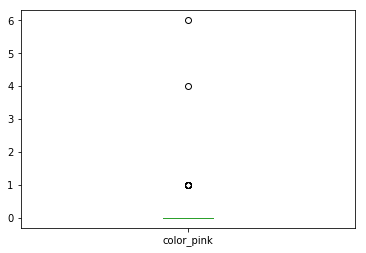

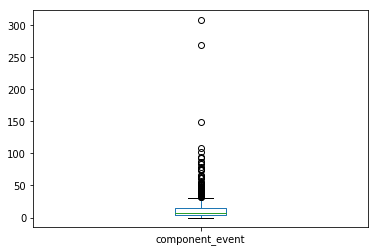

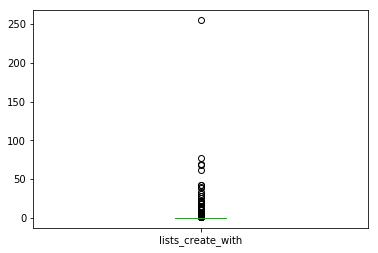

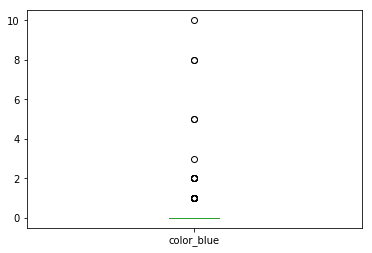

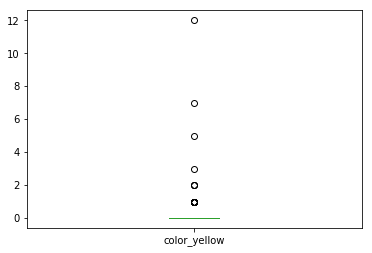

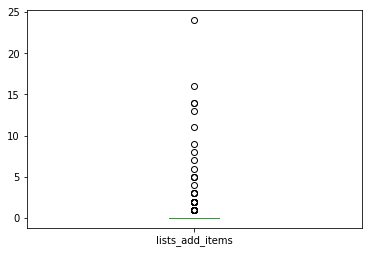

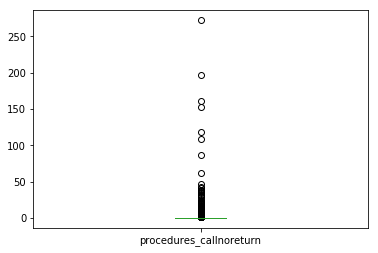

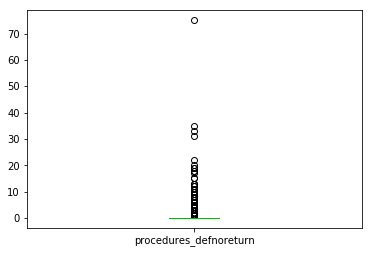

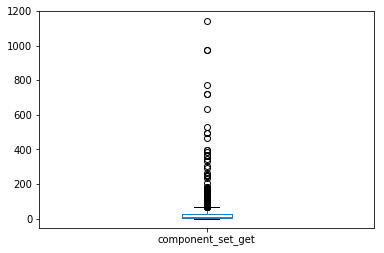

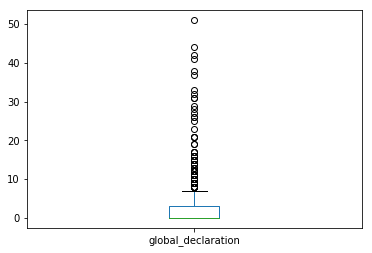

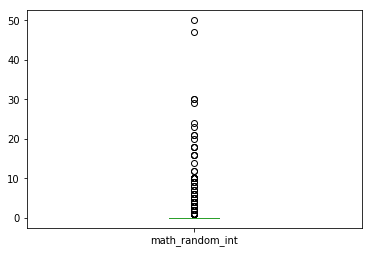

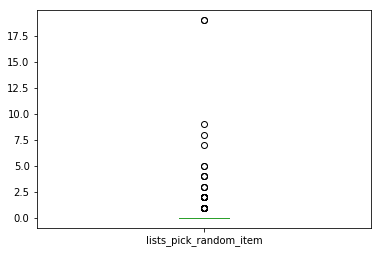

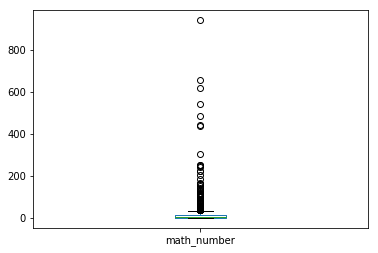

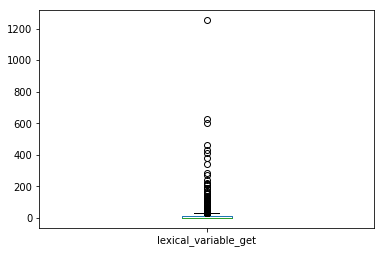

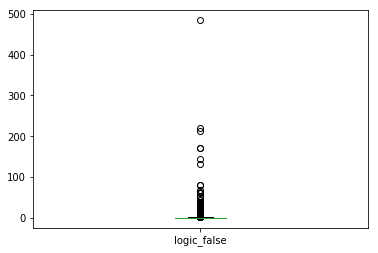

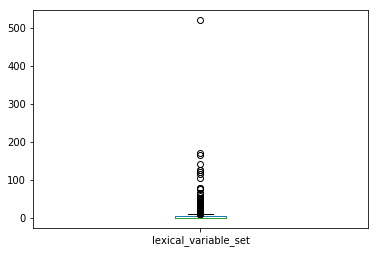

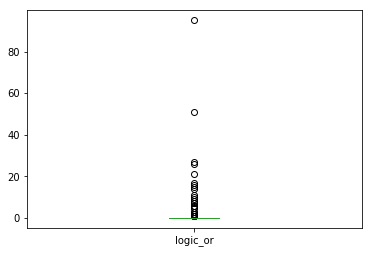

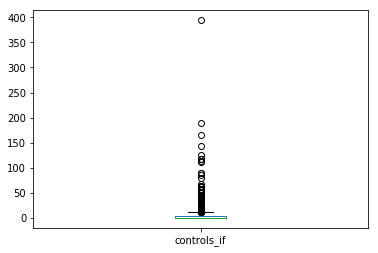

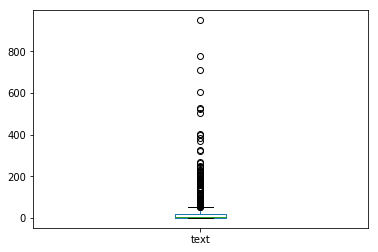

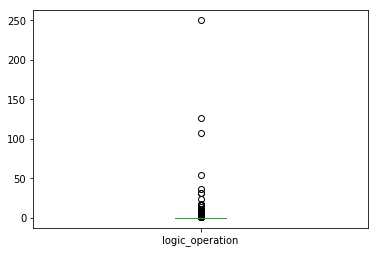

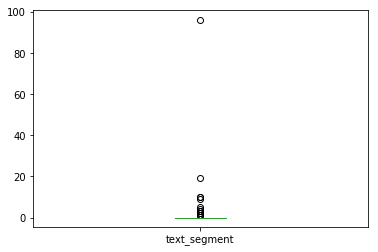

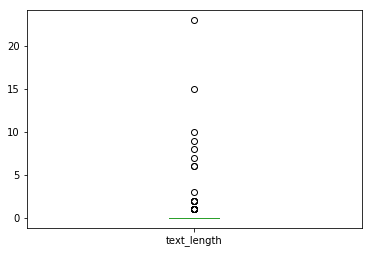

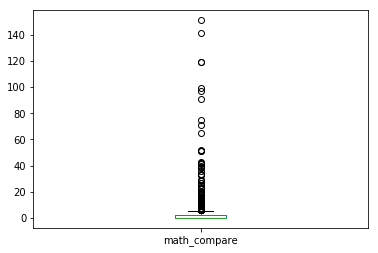

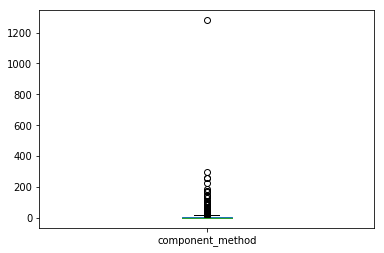

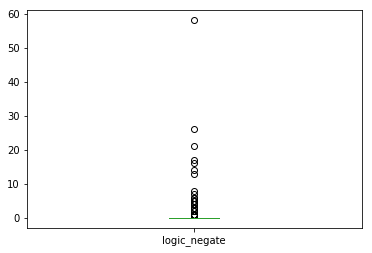

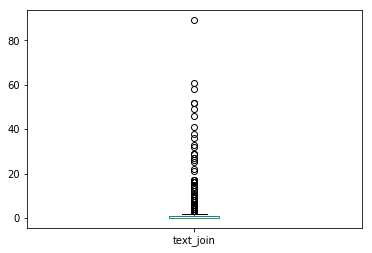

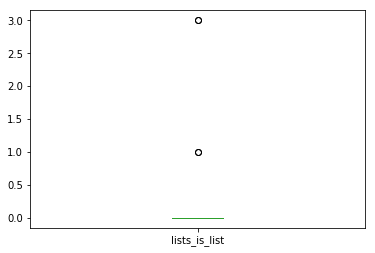

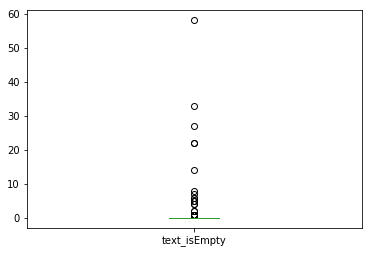

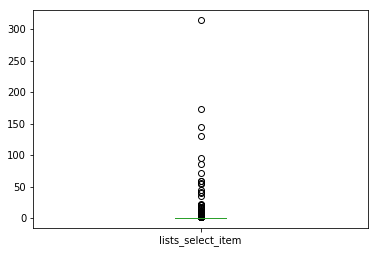

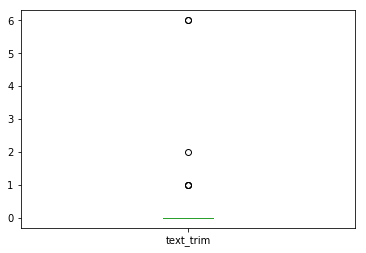

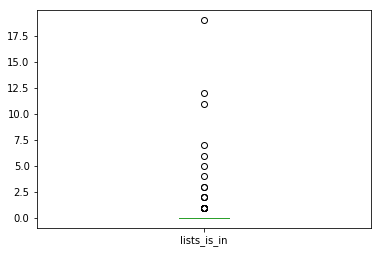

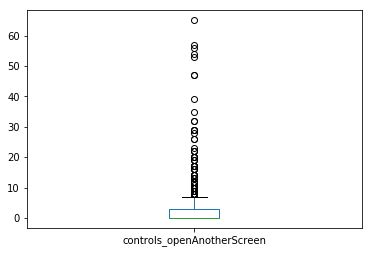

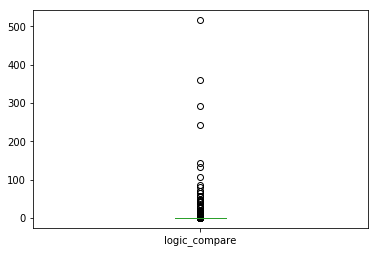

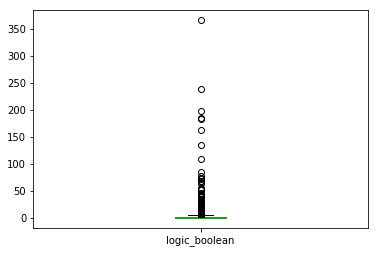

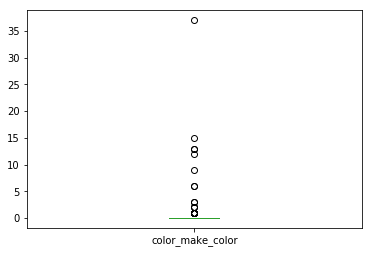

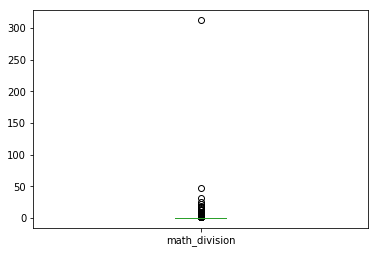

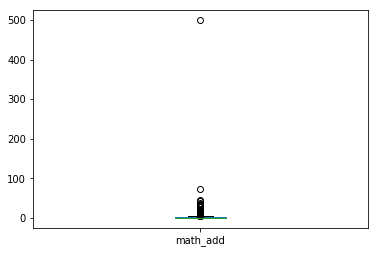

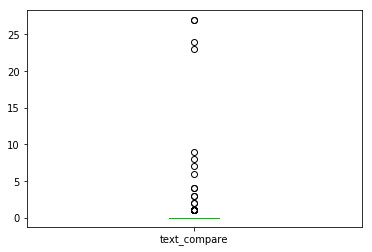

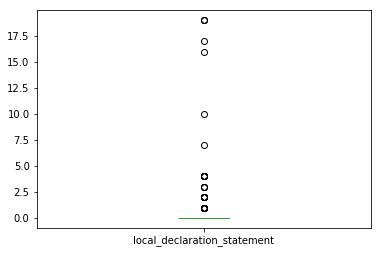

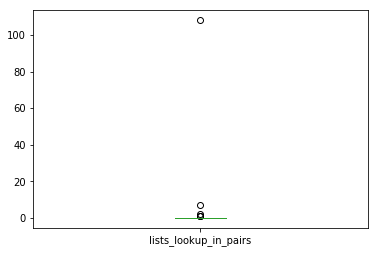

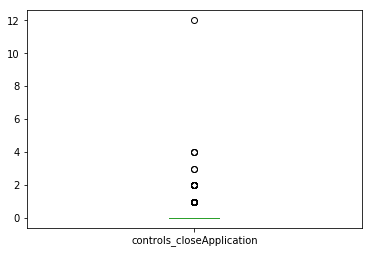

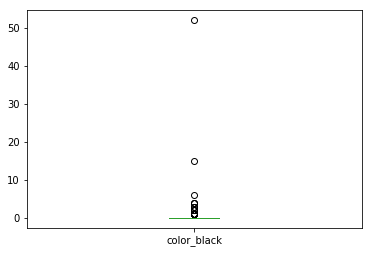

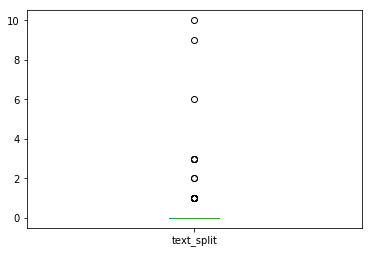

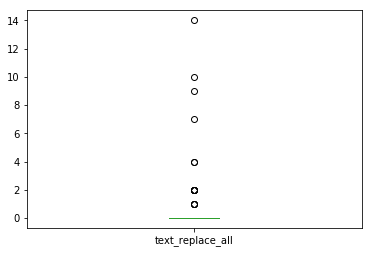

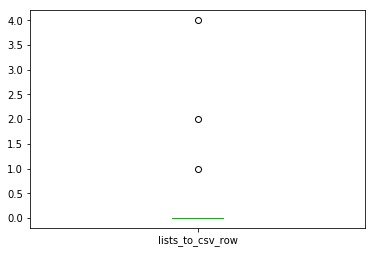

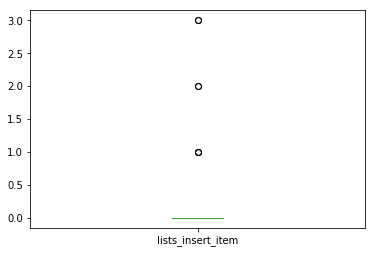

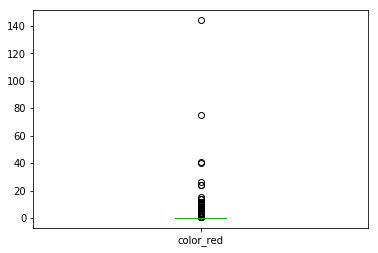

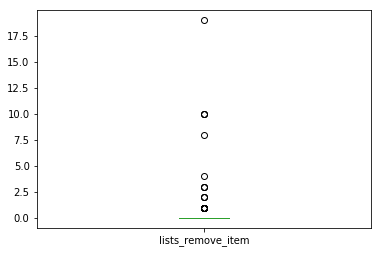

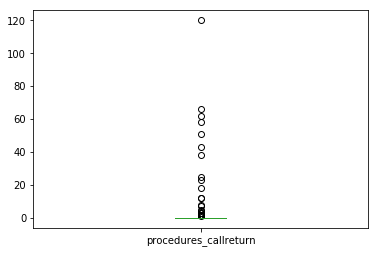

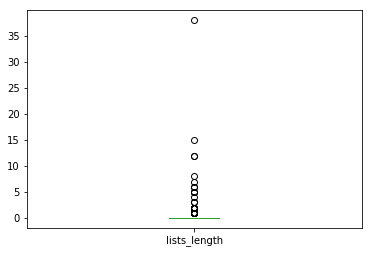

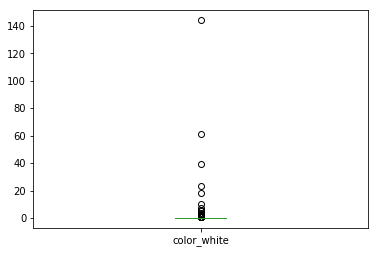

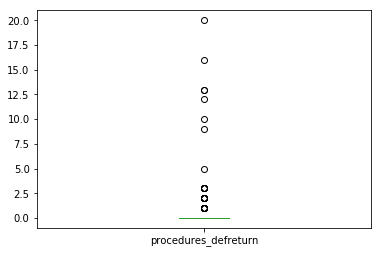

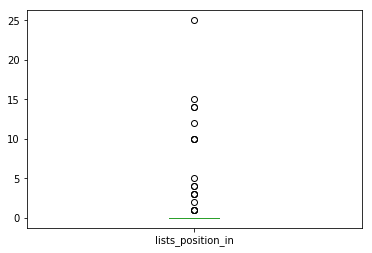

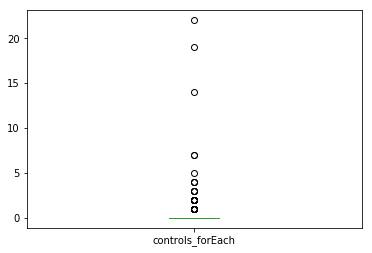

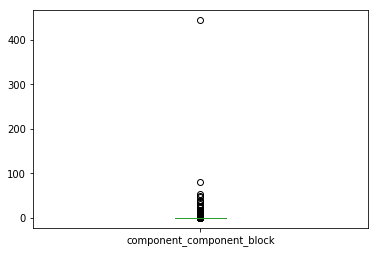

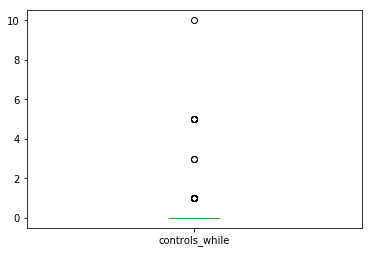

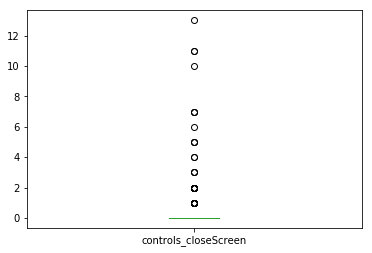

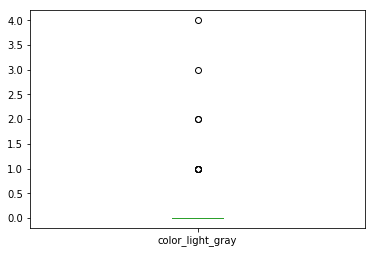

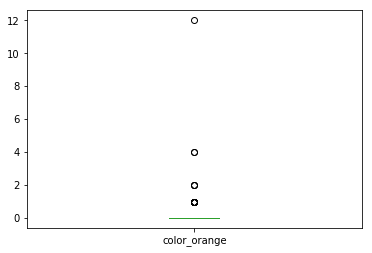

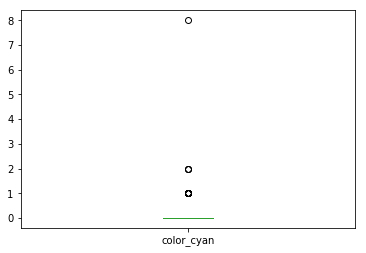

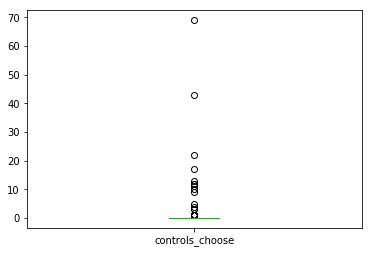

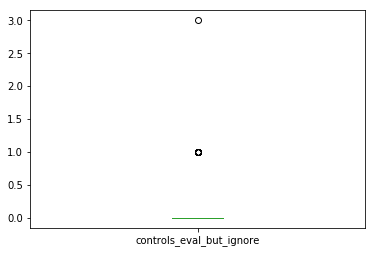

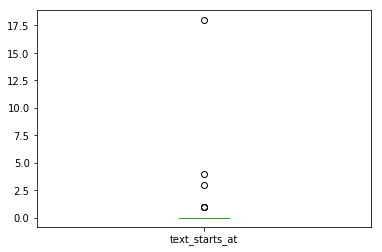

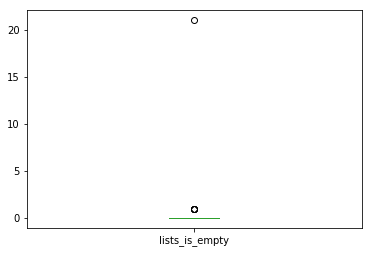

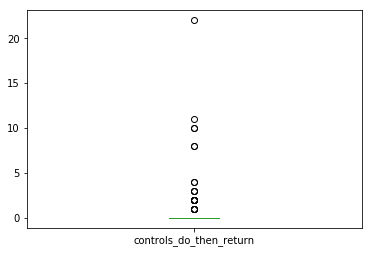

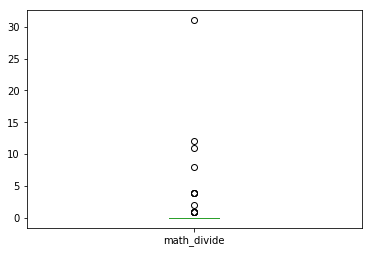

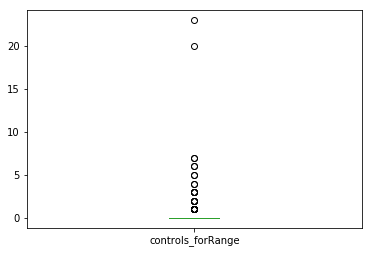

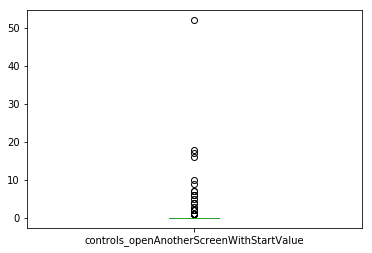

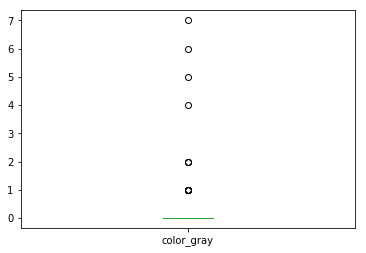

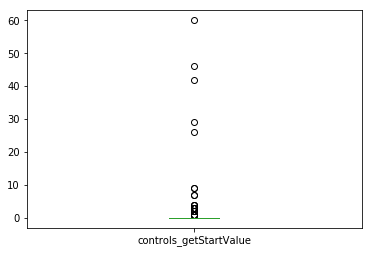

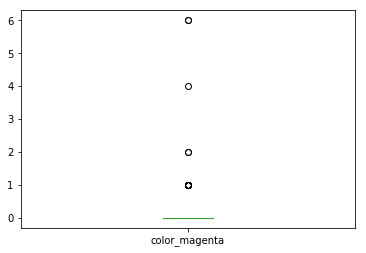

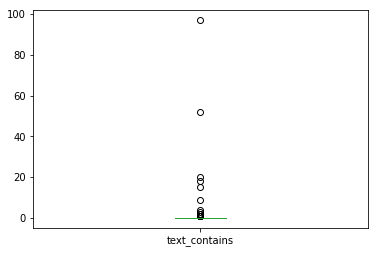

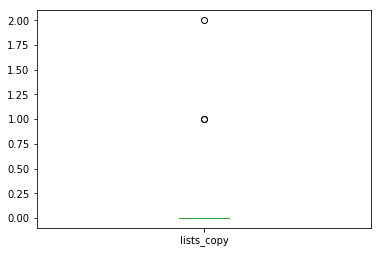

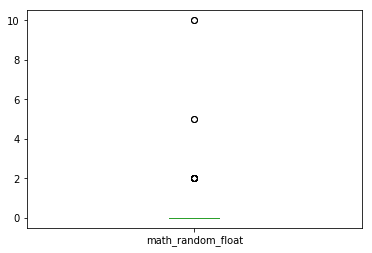

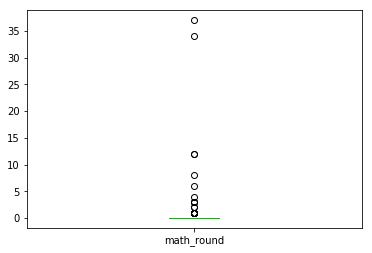

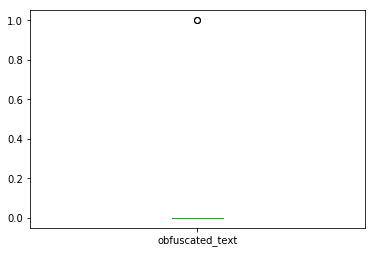

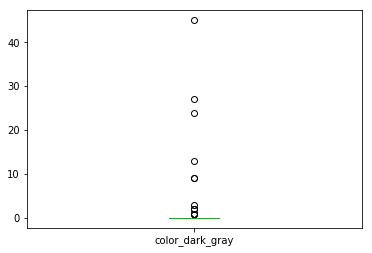

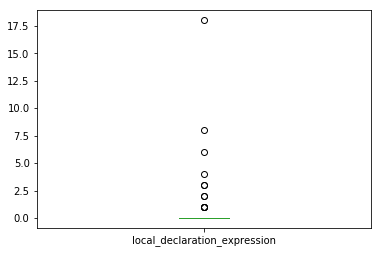

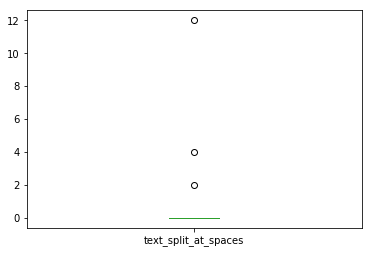

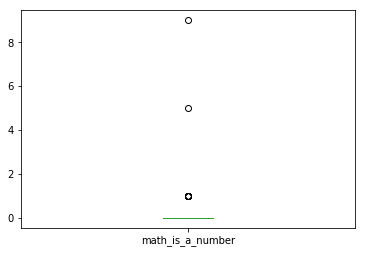

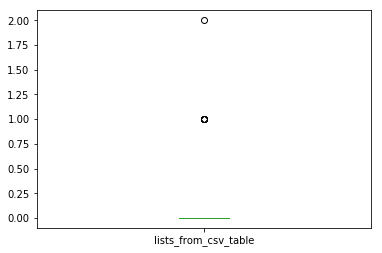

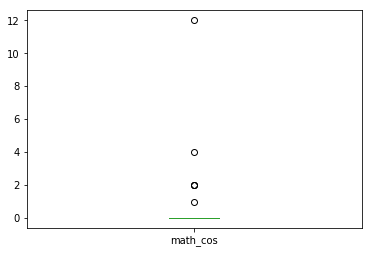

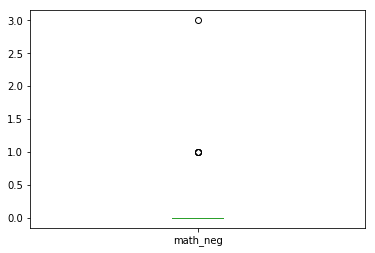

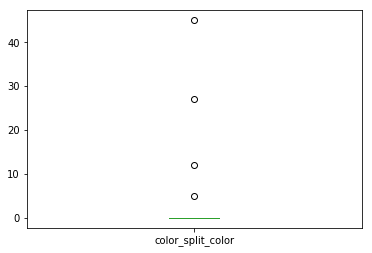

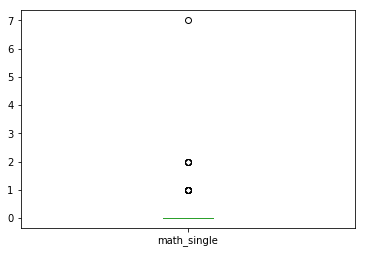

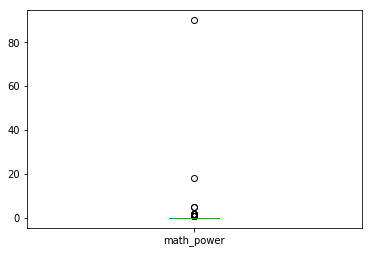

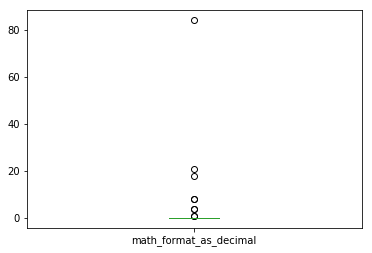

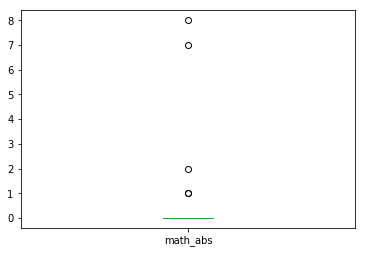

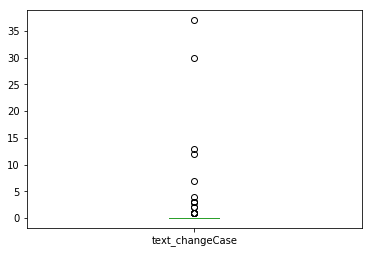

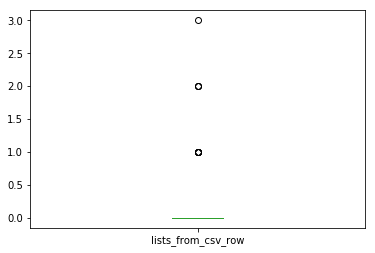

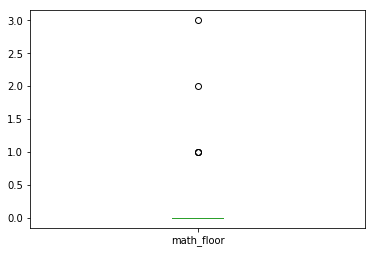

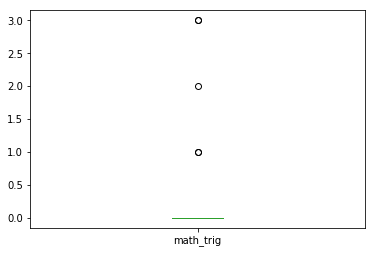

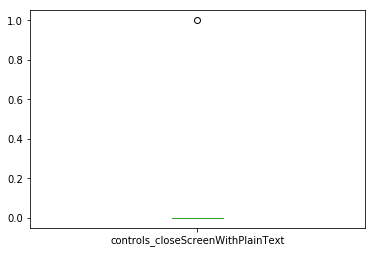

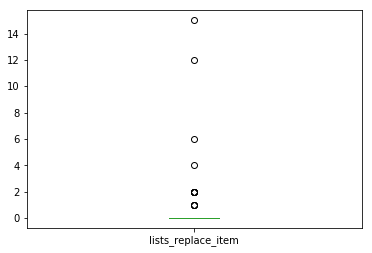

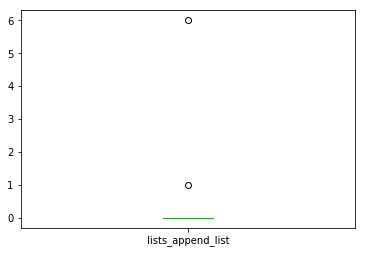

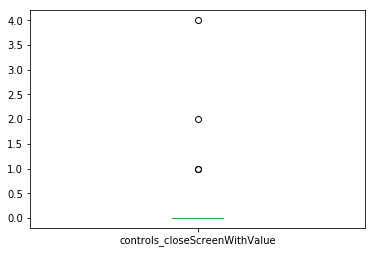

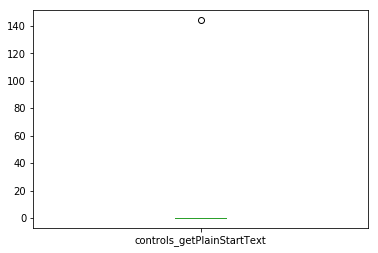

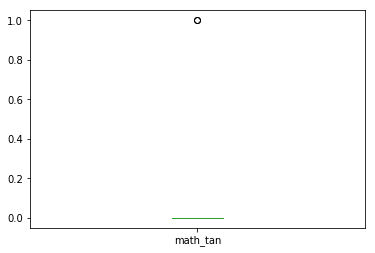

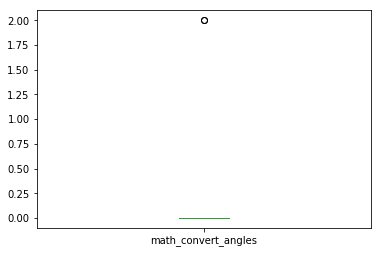

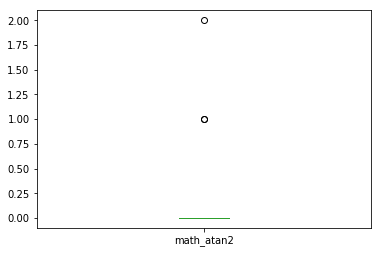

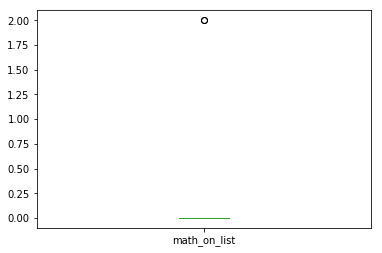

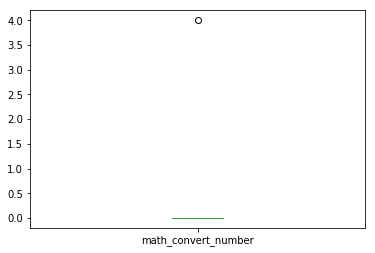

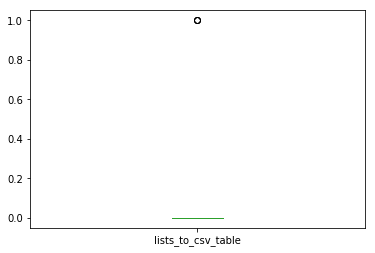

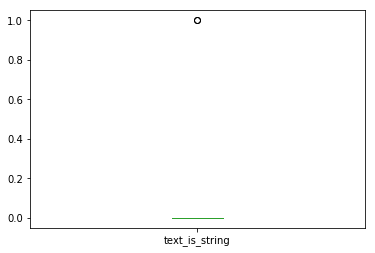

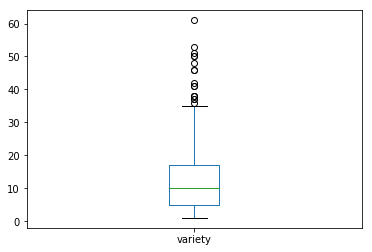

In [15]:
for elem in blocks.columns:
    if elem != 'aia':
        blocks[elem].plot.box()
        plt.show()

In [11]:
# pd.options.display.max_rows = 100
# pd.options.display.max_columns = 30
sort_blocks = blocks.nlargest(blocks.shape[0],'variety')
aia_sort_blocks = sort_blocks.pop('aia')

In [12]:
used_blocks = sort_blocks[sort_blocks.loc[:] > 0].count()
sort_used = used_blocks.nlargest(used_blocks.shape[0])
# pd.options.display.max_rows = 1000
# pd.options.display.max_columns = 30
sort_used_number = sort_used.pop('number')
sort_used_variety = sort_used.pop('variety')
sort_used.head()

component_event         725
component_set_get       634
text                    587
component_method        548
lexical_variable_get    442
dtype: int64

In [13]:
repeated_blocks = sort_blocks.sum()
sort_rep = repeated_blocks.nlargest(repeated_blocks.shape[0])
sort_rep_number = sort_rep.pop('number')
sort_rep_variety = sort_rep.pop('variety')
sort_rep.head()

component_set_get       28927
text                    22644
math_number             15308
lexical_variable_get    14662
component_event          9599
dtype: int64

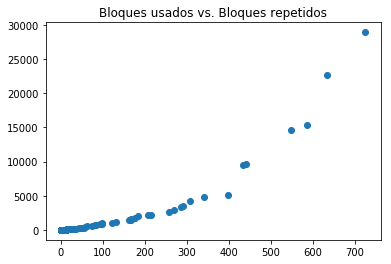

0.843241850540436


In [14]:
plt.scatter(x=sort_used, y=sort_rep)
plt.title("Bloques usados vs. Bloques repetidos")
plt.show()
print(sort_rep.corr(sort_used)) # Correlación entre bloques repetidos y usados

In [15]:
max_var = sort_blocks['variety'] == sort_blocks['variety'].max()
print("Número de bloques que pertenecen al proyecto más variado:\n", sort_blocks[max_var]['number'])

Número de bloques que pertenecen al proyecto más variado:
 name
LEDController    4115
Name: number, dtype: int64


### Bloques más y menos utilizados para TODOS los proyectos

In [16]:
most_used = blocks[blocks.columns.difference(['aia'])].sum()
most_used_number = most_used.pop('number')
most_used_variety = most_used.pop('variety')

In [17]:
most_used.nlargest(most_used.shape[0]).sum()

154382

In [18]:
most_used.nsmallest(most_used.shape[0]).head()

controls_closeScreenWithPlainText    1
math_tan                             2
obfuscated_text                      2
text_is_string                       2
lists_to_csv_table                   3
dtype: int64

### Para proyectos con menos de 10 bloques diferentes

In [19]:
small = blocks['variety'] <= 10
sm_projs = blocks[small]
sm_projs['number'].describe()

count     378.000000
mean       66.335979
std       197.284391
min         1.000000
25%        13.000000
50%        31.000000
75%        55.000000
max      2664.000000
Name: number, dtype: float64

In [20]:
sm_most_used = sm_projs[sm_projs.columns.difference(['aia'])].sum()
sm_number = sm_most_used.pop('number')
sm_variety = sm_most_used.pop('variety')

In [21]:
sm_most_used.nlargest(sm_most_used.shape[0]).head()

component_set_get             5562
text                          4538
component_event               3960
component_method              3484
controls_openAnotherScreen    1277
dtype: int64

In [22]:
sm_most_used.nsmallest(sm_most_used.shape[0]).head()

text_trim              0
math_divide            0
math_cos               0
controls_forEach       0
math_convert_number    0
dtype: int64

In [66]:
results = pd.read_csv('results.csv', index_col='name')
results_index = sm_projs["aia"].values
sm_results = results.index.isin(results_index)
results[sm_results]['total'].describe()

count    378.000000
mean       9.894180
std        3.270221
min        3.000000
25%        7.000000
50%       10.000000
75%       12.000000
max       19.000000
Name: total, dtype: float64

In [24]:
results_index = blocks["aia"].values
all_results = results.index.isin(results_index)
results[all_results & ~sm_results]['total'].describe()

18.0


count    352.000000
mean      18.568182
std        5.331828
min        7.000000
25%       15.000000
50%       18.000000
75%       21.000000
max       36.000000
Name: total, dtype: float64

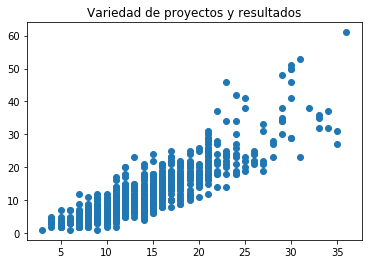

0.9942674447252972

In [25]:
plt.scatter(x=results[all_results]['total'], y=blocks['variety'])
plt.title("Variedad de proyectos y resultados")
plt.show()
results[all_results]['total'].corr(blocks['variety'])

# El próximo paso es comprobar las combinaciones más repetidas

In [26]:
color = blocks.columns[blocks.columns.str.contains("color")]
blocks[color].sum().sum()

2452

In [27]:
controls = blocks.columns[blocks.columns.str.contains("controls")]
blocks[controls].sum().sum()

8915

In [28]:
lists = blocks.columns[blocks.columns.str.contains("lists")]
blocks[lists].sum().sum()

4381

In [29]:
logic = blocks.columns[blocks.columns.str.contains("logic")]
blocks[logic].sum().sum()

12792

In [30]:
variable = blocks.columns[blocks.columns.str.contains("lexical")]
blocks[variable].sum().sum()

19539

In [31]:
procedure = blocks.columns[blocks.columns.str.contains("procedures")]
blocks[procedure].sum().sum()

4282

In [32]:
math = blocks.columns[blocks.columns.str.contains("math")]
blocks[math].sum().sum()

24862

In [33]:
component = blocks.columns[blocks.columns.str.contains("component")]
blocks[component].sum().sum()

49507

In [34]:
text = blocks.columns[blocks.columns.str.contains("text")]
blocks[text].sum().sum()

25426

In [35]:
global_v = blocks.columns[blocks.columns.str.contains("global")]
blocks[global_v].sum().sum()

1984

In [36]:
local_v = blocks.columns[blocks.columns.str.contains("local")]
blocks[local_v].sum().sum()

242

In [104]:
max_number = blocks['number'] == blocks['number'].max()
max_variety = blocks['variety'] == blocks['variety'].max()
index = blocks[max_number | max_variety]['aia'].values
result_index = results.index.isin(index)
print(blocks[max_number | max_variety][['number','variety']])
results[result_index]


               number  variety
name                          
jokenpo          5476       16
LEDController    4115       61


,scr,naming,conditional,events,loop,proc,lists,dp,sensors,media,social,connect,draw,operator,ui,total
name,,,,,,,,,,,,,,,,
prjokenpo0418212533,2,2,3,2,0,0,0,2,0,1,0,0,0,3,3,18
prLEDChairCont0318112141,3,2,3,3,3,3,3,2,1,2,0,2,3,3,3,36


ValueError: Shape of passed values is (3, 1949), indices imply (3, 1866)